In [2]:
!pip install alphashape

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.2/535.2 kB 4.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 26.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 694.7/694.7 kB 60.2 MB/s eta 0:00:00


In [1]:
# Importaciones necesarias
from IPython.display import Image     # Import the Image function from IPython.display to display images in Jupyter environments.
from os import chdir                  # Import chdir from os module to change the current working directory.
from scipy.spatial import Delaunay    # Import Delaunay
import numpy as np                    # Import numpy library for working with n-dimensional arrays and mathematical operations.
import gudhi as gd                    # Import gudhi library for computational topology and computational geometry.
import matplotlib.pyplot as plt       # Import pyplot from matplotlib for creating visualizations and graphs.
import argparse                       # Import argparse, a standard library for writing user-friendly command-line interfaces.
import seaborn as sns                 # Import seaborn for data visualization; it's based on matplotlib and provides a high-level interface for drawing statistical graphs.
import requests                       # Import requests library to make HTTP requests in Python easily.
import pandas as pd                   # Import pandas for data manipulation and analysis.
from scipy.spatial.distance import pdist, squareform  # Import distance functions from scipy.spatial.distance
import os
from os import path, makedirs
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay, delaunay_plot_2d
from alphashape import alphashape

       id Tipo    X    Y  Z
0       1    B  105   81  0
1       1    B  106   81  0
2       1    B  107   81  0
3       1    B  108   81  0
4       1    B  103   82  0
...   ...  ...  ...  ... ..
7413  164    B  151  180  0
7414  164    B  152  180  0
7415  160    B  122  181  0
7416  160    B  123  181  0
7417  160    B  124  181  0

[7418 rows x 5 columns]


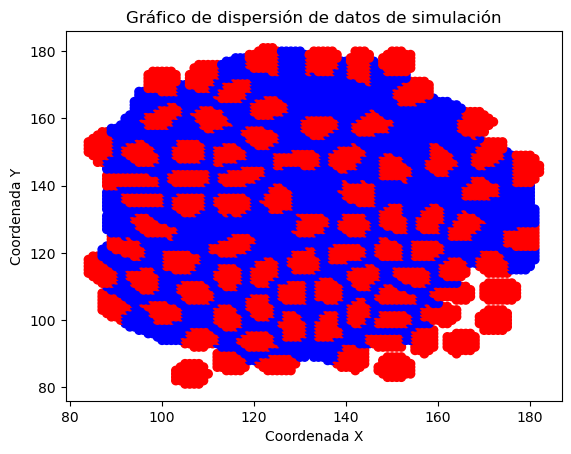

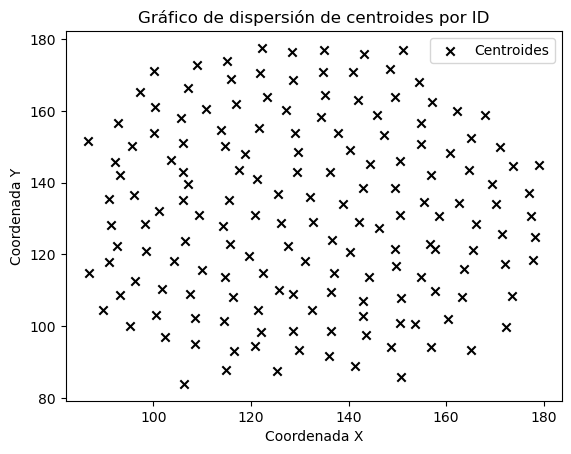

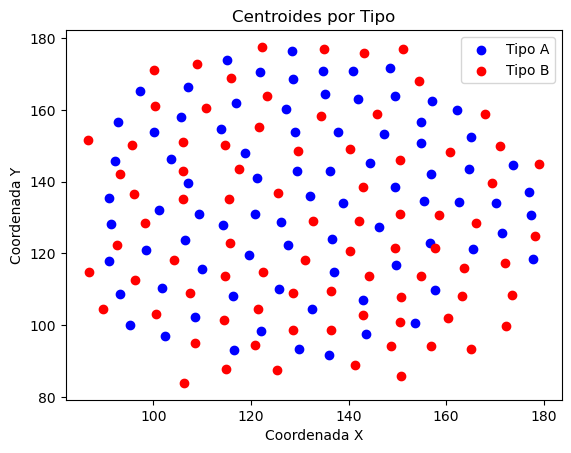

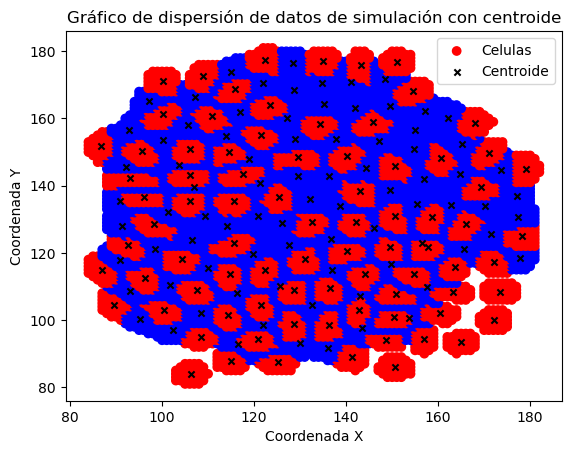

     centroides_x  centroides_y tipo
0      106.255814     83.953488    B
1      114.928571     87.952381    B
2      125.272727     87.477273    B
3      129.888889     93.266667    A
4      136.000000     91.630435    A
..            ...           ...  ...
159    122.363636    177.522727    B
160    128.391304    176.500000    A
161    134.909091    177.045455    B
162    143.170732    175.804878    B
163    151.146341    176.853659    B

[164 rows x 3 columns]
[ 9.55028084 19.34063206 25.40191963 ...  8.3542647  16.23838327
  8.04427072]
Máximo: 103.1775221485333, Mínimo: 1.7545502170464533, Promedio: 44.818909467516924


In [2]:
# Cargar datos desde un archivo CSV
url = "carpeta_csv/archivo_3.csv"
df = pd.read_csv(url, header=None)
df.head(5)

# Asignar nombres a las columnas
nombres_columnas = ['id', "Tipo", 'X', 'Y', "Z"]  # Reemplaza con los nombres que correspondan
df.columns = nombres_columnas

# Mostrar el DataFrame
print(df)

# Extraer las coordenadas X e Y y el tipo
X = df['X']
Y = df['Y']
tipo = df['Tipo']
id1 = df['id']

# Crear un mapa de colores basado en los tipos
colores = {'A': 'b', 'B': 'r'}  # Ajusta los colores a cada tipo
colores_puntos = [colores[t] for t in tipo]

# Crear y guardar el gráfico de dispersión inicial
plt.scatter(X, Y, c=colores_puntos)
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Gráfico de dispersión de datos de simulación')
if not path.exists('Datos_im'):
    makedirs('Datos_im')
plt.savefig(f'Datos_im/grafico_dispersion_{path.basename(url)}.png')
plt.show()
plt.close()

# Agrupar los datos por el ID
grupos = df.groupby('id')

# Inicializar listas para almacenar los centroides
centroides_x = []
centroides_y = []

# Calcular el centroide para cada grupo
for id_grupo, grupo in grupos:
    X_grupo = grupo['X']
    Y_grupo = grupo['Y']
    centroid_x_grupo = X_grupo.mean()
    centroid_y_grupo = Y_grupo.mean()
    centroides_x.append(centroid_x_grupo)
    centroides_y.append(centroid_y_grupo)

# Crear y guardar el gráfico de dispersión solo con los centroides
plt.scatter(centroides_x, centroides_y, color='black', marker='x', label='Centroides')  # Agregar los centroides al gráfico
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Gráfico de dispersión de centroides por ID')
plt.legend()  # Mostrar la leyenda con la etiqueta de los centroides
plt.savefig(f'Datos_im/grafico_centroides_{path.basename(url)}.png')
plt.show()
plt.close()

# Agrupar los datos por el ID y el Tipo
grupos_tipo = df.groupby(['id', 'Tipo'])

# Inicializar listas para almacenar los centroides y tipos
centroides_x = []
centroides_y = []
tipos_centroides = []

# Calcular el centroide y el tipo para cada grupo
for (id_grupo, tipo_grupo), grupo in grupos_tipo:
    X_grupo = grupo['X']
    Y_grupo = grupo['Y']
    centroid_x_grupo = X_grupo.mean()
    centroid_y_grupo = Y_grupo.mean()
    centroides_x.append(centroid_x_grupo)
    centroides_y.append(centroid_y_grupo)
    tipos_centroides.append(tipo_grupo)  # Guardar el tipo del grupo

# Crear y guardar el gráfico de dispersión con centroides por tipo
for tipo in set(tipos_centroides):
    color = 'b' if tipo == 'A' else 'r'  # Rojo para tipo 'A', azul para tipo 'B'
    indices_tipo = [i for i, t in enumerate(tipos_centroides) if t == tipo]
    centroides_x_tipo = [centroides_x[i] for i in indices_tipo]
    centroides_y_tipo = [centroides_y[i] for i in indices_tipo]
    plt.scatter(centroides_x_tipo, centroides_y_tipo, color=color, label=f'Tipo {tipo}')

plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Centroides por Tipo')
plt.legend()
plt.savefig(f'Datos_im/grafico_centroides_tipo_{path.basename(url)}.png')
plt.show()
plt.close()

# Crear y guardar el gráfico de dispersión combinado
plt.scatter(X, Y, c=colores_puntos, label='Celulas')
plt.scatter(centroides_x, centroides_y, color='black', marker='x', s=20, label='Centroide')  # Agregar el centroide al gráfico
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Gráfico de dispersión de datos de simulación con centroide')
plt.legend() 
plt.savefig(f'Datos_im/grafico_dispersion_centroides_{path.basename(url)}.png')
plt.show()
plt.close()

# Crear DataFrame con los centroides y tipos
df_centroides = pd.DataFrame({"centroides_x": centroides_x, "centroides_y": centroides_y, "tipo": tipos_centroides})
print(df_centroides)

# Guardar el DataFrame de centroides en un archivo CSV
output_dir = 'centroides'
if not path.exists(output_dir):
    makedirs(output_dir)
input_filename = path.basename(url)
output_filename = f"{output_dir}/centroides_{input_filename}"
df_centroides.to_csv(output_filename, index=False)

# Matriz de distancias
matrix_distance = pdist(df_centroides[['centroides_x', 'centroides_y']], metric='euclidean')
print(matrix_distance)

# Estadísticas de la matriz de distancias
maximo = matrix_distance.max()
minimo = matrix_distance.min()
promedio = matrix_distance.mean()
print(f"Máximo: {maximo}, Mínimo: {minimo}, Promedio: {promedio}")


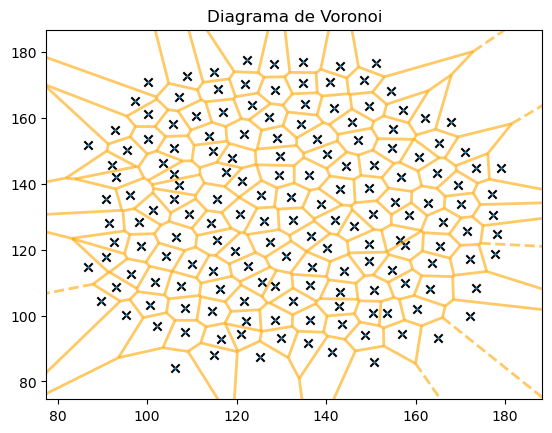

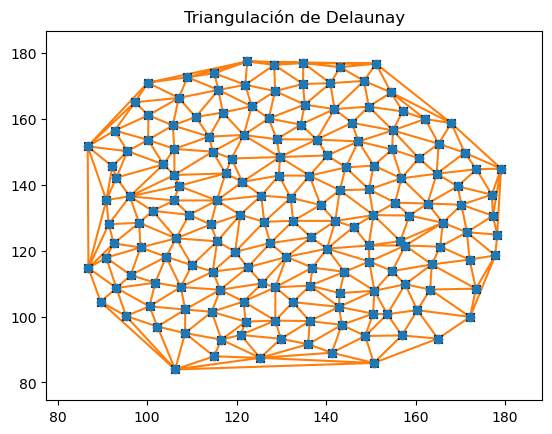

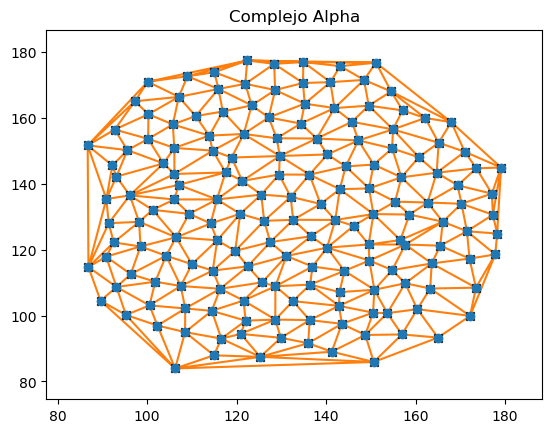

In [3]:
# diagrama de Voronoi
points = np.column_stack((centroides_x, centroides_y))
vor = Voronoi(points)
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=2)
plt.scatter(centroides_x, centroides_y, color='black', marker='x')
plt.title('Diagrama de Voronoi')
plt.savefig(f'Datos_im/diagrama_voronoi_{path.basename(url)}.png')
plt.show()

# triángulo de Delaunay
delaunay_tri = Delaunay(points)
fig, ax = plt.subplots()
delaunay_plot_2d(delaunay_tri, ax=ax)
plt.scatter(centroides_x, centroides_y, color='black', marker='x')
plt.title('Triangulación de Delaunay')
plt.savefig(f'Datos_im/triangulacion_delaunay_{path.basename(url)}.png')
plt.show()

#  el complejo Alpha
fig, ax = plt.subplots()
delaunay_plot_2d(delaunay_tri, ax=ax)
plt.scatter(centroides_x, centroides_y, color='black', marker='x')
plt.title('Complejo Alpha') #(aproximación con Delaunay)
plt.savefig(f'Datos_im/complejo_alpha_{path.basename(url)}.png')
plt.show()

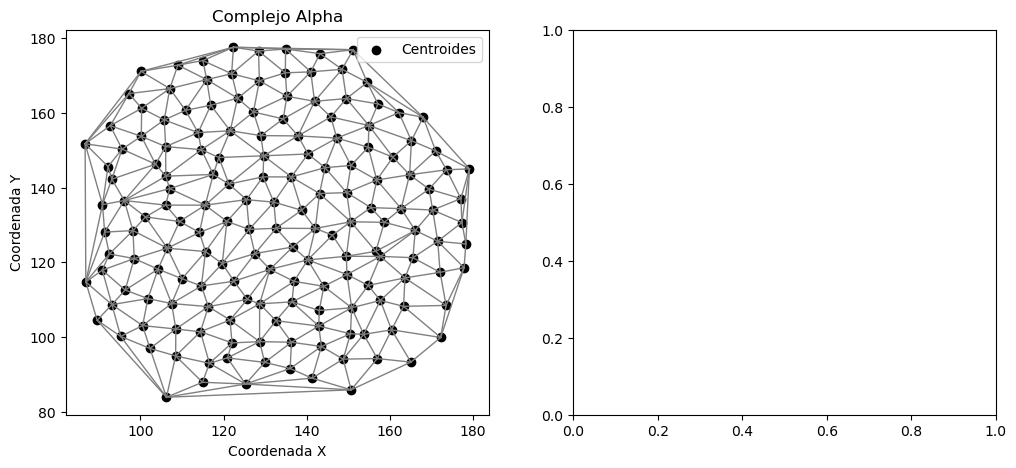

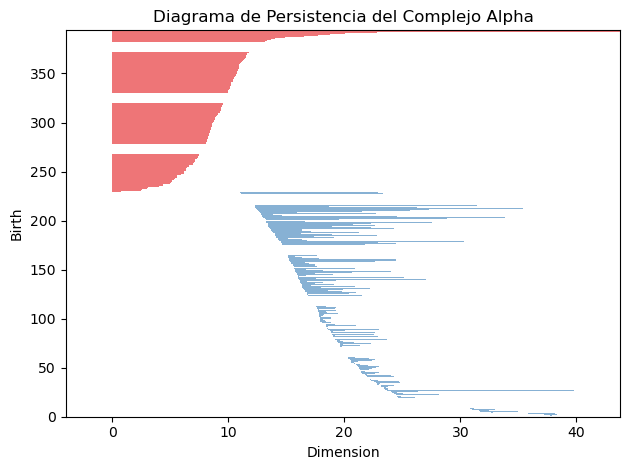

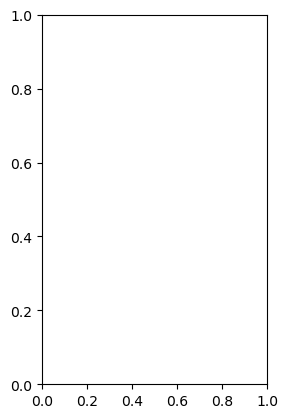

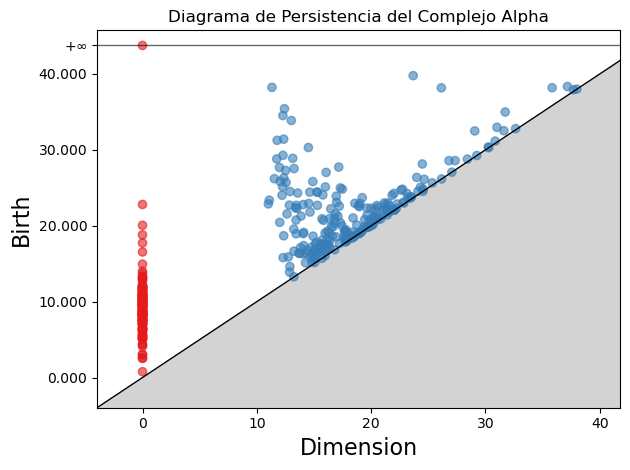

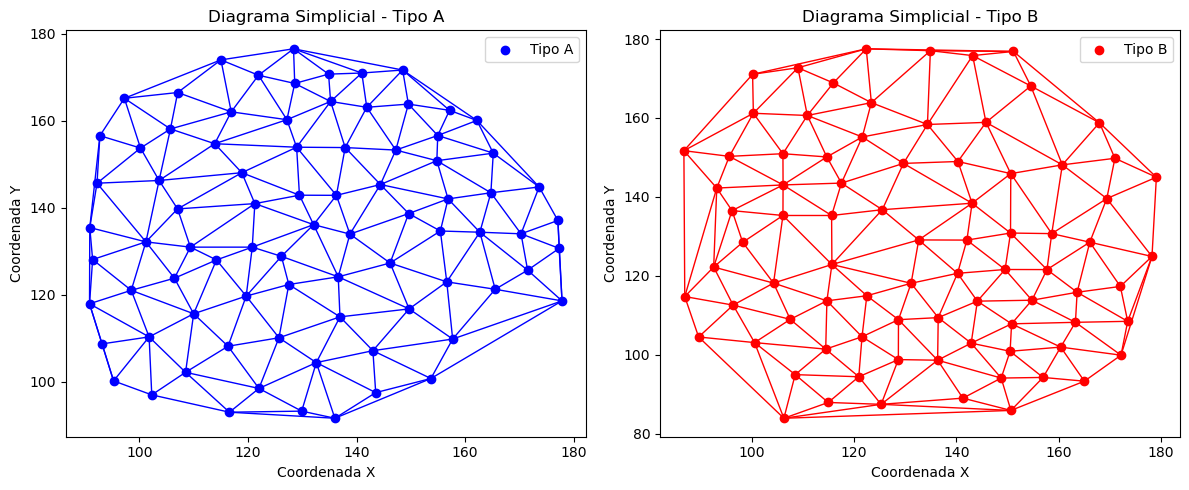

<Figure size 1200x500 with 0 Axes>

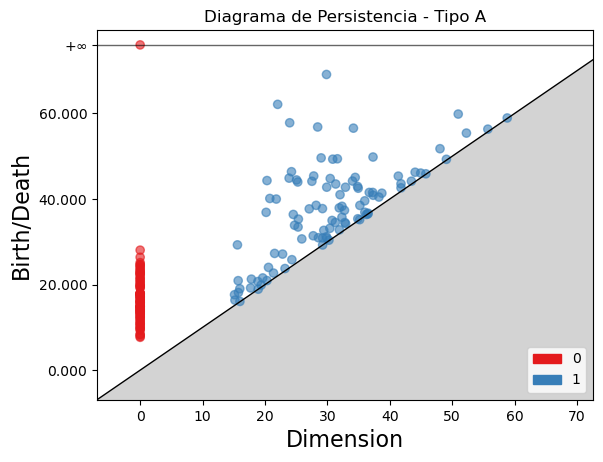

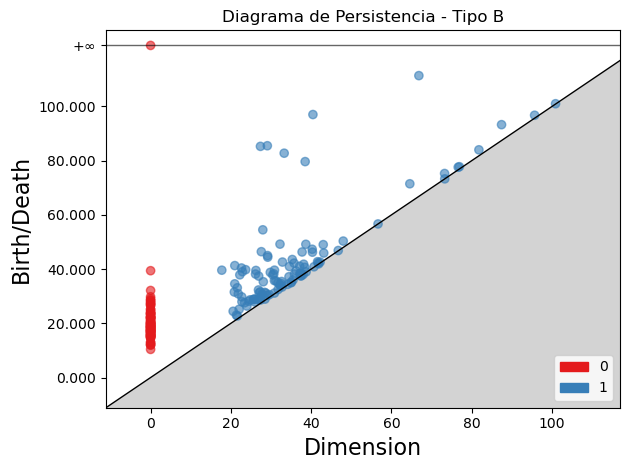

Distancia de Bottleneck: 27.891897796346626
Distancia de Bottleneck: 11.357222158662097


In [5]:
# Calcular el complejo Alpha
alpha_complex = gd.AlphaComplex(points=points)
simplex_tree = alpha_complex.create_simplex_tree()

# Visualizar el complejo Alpha
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(centroides_x, centroides_y, color='black', label='Centroides')
for simplex in simplex_tree.get_skeleton(1):  # Obtener las aristas
    if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
        arista = simplex[0]
        x = [centroides_x[i] for i in arista]
        y = [centroides_y[i] for i in arista]
        plt.plot(x, y, color='gray', linestyle='-', linewidth=1)
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Complejo Alpha')
plt.legend()

# Calcular el diagrama de persistencia
diag = simplex_tree.persistence()

# Mostrar el diagrama de persistencia
plt.subplot(1, 2, 2)
gd.plot_persistence_barcode(diag)
plt.title('Diagrama de Persistencia del Complejo Alpha')
plt.xlabel('Dimension')
plt.ylabel('Birth')
plt.tight_layout()
plt.show()

plt.subplot(1, 2, 2)
gd.plot_persistence_diagram(diag)
plt.title('Diagrama de Persistencia del Complejo Alpha')
plt.xlabel('Dimension')
plt.ylabel('Birth')
plt.tight_layout()
plt.show()

# Separar los centroides por tipo
centroides_tipo_A = [(x, y) for x, y, tipo in zip(centroides_x, centroides_y, tipos_centroides) if tipo == 'A']
centroides_tipo_B = [(x, y) for x, y, tipo in zip(centroides_x, centroides_y, tipos_centroides) if tipo == 'B']

# Convertir las coordenadas de los centroides a un formato adecuado para Gudhi
puntos_tipo_A = np.array(centroides_tipo_A)
puntos_tipo_B = np.array(centroides_tipo_B)

# Calcular el complejo Alpha para cada tipo
alpha_complex_A = gd.AlphaComplex(points=puntos_tipo_A)
alpha_complex_B = gd.AlphaComplex(points=puntos_tipo_B)

# Generar un diagrama simplicial para cada tipo
simplex_tree_A = alpha_complex_A.create_simplex_tree()
simplex_tree_B = alpha_complex_B.create_simplex_tree()

# Visualizar los diagramas simpliciales para cada tipo
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for simplex in simplex_tree_A.get_skeleton(1):
    if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
        arista = simplex[0]
        x = [puntos_tipo_A[i][0] for i in arista]
        y = [puntos_tipo_A[i][1] for i in arista]
        plt.plot(x, y, color='blue', linestyle='-', linewidth=1)  # Color azul para tipo A
plt.scatter(puntos_tipo_A[:, 0], puntos_tipo_A[:, 1], color='blue', label='Tipo A')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Diagrama Simplicial - Tipo A')
plt.legend()

plt.subplot(1, 2, 2)
for simplex in simplex_tree_B.get_skeleton(1):
    if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
        arista = simplex[0]
        x = [puntos_tipo_B[i][0] for i in arista]
        y = [puntos_tipo_B[i][1] for i in arista]
        plt.plot(x, y, color='red', linestyle='-', linewidth=1)  # Color rojo para tipo B
plt.scatter(puntos_tipo_B[:, 0], puntos_tipo_B[:, 1], color='red', label='Tipo B')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Diagrama Simplicial - Tipo B')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

gd.plot_persistence_diagram(simplex_tree_A.persistence(), legend=True)
plt.title('Diagrama de Persistencia - Tipo A')
plt.xlabel('Dimension')
plt.ylabel('Birth/Death')

gd.plot_persistence_diagram(simplex_tree_B.persistence(), legend=True)
plt.title('Diagrama de Persistencia - Tipo B')
plt.xlabel('Dimension')
plt.ylabel('Birth/Death')

plt.tight_layout()
plt.show()

# Calcular los diagramas de persistencia para cada tipo
simplex_tree_A.compute_persistence()
simplex_tree_B.compute_persistence()

diag_persistencia_tipo_A = simplex_tree_A.persistence_intervals_in_dimension(1)
diag_persistencia_tipo_B = simplex_tree_B.persistence_intervals_in_dimension(1)
diag_persistencia_tipo_A_0 = simplex_tree_A.persistence_intervals_in_dimension(0)
diag_persistencia_tipo_B_0 = simplex_tree_B.persistence_intervals_in_dimension(0)

#print("Diagrama de Persistencia - Tipo A (Dimensión 1):", diag_persistencia_tipo_A)
#print("Diagrama de Persistencia - Tipo B (Dimensión 1):", diag_persistencia_tipo_B)

#print("Diagrama de Persistencia - Tipo A (Dimensión 0):", diag_persistencia_tipo_A_0)
#print("Diagrama de Persistencia - Tipo B (Dimensión 0):", diag_persistencia_tipo_B_0)

# Calcular la distancia de Bottleneck entre los dos diagramas de persistencia
distancia_bottleneck = gd.bottleneck_distance(diag_persistencia_tipo_A, diag_persistencia_tipo_B)
print("Distancia de Bottleneck:", distancia_bottleneck)

# Calcular la distancia de Bottleneck entre los dos diagramas de persistencia
distancia_bottleneck_0 = gd.bottleneck_distance(diag_persistencia_tipo_A_0, diag_persistencia_tipo_B_0)
print("Distancia de Bottleneck:", distancia_bottleneck_0)
